# Sklearn

## sklearn.tree

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

примеры: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [519]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree ,ensemble

import numpy as np


In [41]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda/envs/python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Генерация данных

In [ ]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [ ]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [ ]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c=classification_problem[1], cmap=colors, s=100)

In [ ]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier

### Разделяющая поверхность

In [ ]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [ ]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 2),
                      train_data, train_labels, test_data, test_labels)

In [ ]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

In [ ]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1),
                      train_data, train_labels, test_data, test_labels)

In [ ]:
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf = 3), 
                      train_data, train_labels, test_data, test_labels)

In [653]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
import pandas as pd

In [568]:
datas = pd.read_csv('XMRH18_20171215_20180226.csv')
# beginnig in 20171215 8: 56 :00
datas = datas.drop(['<TICKER>','<PER>','<DATE>'], axis =1)
#pyplot.plot(np.linspace(0,100,106000),datas['<OPEN>'])
datas = datas.drop(range(0,5000), axis =0)


[0.0293,
 0.0293,
 0.0293,
 0.0293,
 0.0293,
 0.0293,
 0.0293,
 0.0293,
 0.028274000000000001,
 0.028274000000000001]

In [639]:
len_of_past = 50
y = []
X = [] 
i =5000 + len_of_past
while i < datas.shape[0] :
    y.append(datas['<OPEN>'][i])
    X.append(list(datas['<OPEN>'][i-len_of_past-5000:i-5000]))
    i+=len_of_past
    
X_all = np.array(X)
y_all = np.array(y)

i = i =5000 + len_of_past
while i < datas.shape[0] :
    y.append(datas['<OPEN>'][i])
    X.append(list(datas['<OPEN>'][i-len_of_past-5000:i-5000]))
    i+=1




In [640]:
from sklearn.cross_validation import train_test_split

In [646]:
train_data, test_data,y_train,y_test = train_test_split(X_all,y_all, test_size = 0.3,random_state =0)

[  2.81418474e-05   2.23086912e-05   3.47246129e-05   4.21745577e-05
   5.05477099e-05   8.22955056e-05   1.24543738e-05   1.25850048e-04
   5.61211930e-05   2.53755132e-05   2.05978437e-05   5.12182863e-05
   1.19023153e-05   2.42107222e-05   1.72120110e-05   6.80775160e-06
   3.29486876e-05   1.12745736e-04   6.52354609e-05   3.00120422e-05
   9.41000406e-05   1.39826826e-04   1.48265526e-04   2.35022890e-05
   8.17968094e-05   6.05853557e-05   2.36084700e-05   8.58153412e-05
   3.57624522e-04   5.91023601e-04   5.57158168e-04   3.33484269e-04
   6.53815673e-04   4.46026437e-04   9.67626431e-04   5.08223177e-04
   1.21886420e-03   1.06815694e-03   6.85219301e-04   8.56829997e-04
   3.85679982e-03   2.85165092e-03   5.84139090e-03   3.78963149e-03
   1.02262655e-02   1.86559456e-02   2.04415252e-02   2.91073100e-02
   1.04361986e-01   7.91113056e-01]


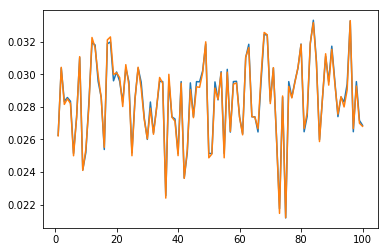

0.00522679294413
[[ 0.025389  0.026094  0.026094 ...,  0.026225  0.026225  0.026225]
 [ 0.030414  0.030414  0.030414 ...,  0.030433  0.030433  0.030433]
 [ 0.028156  0.028156  0.028156 ...,  0.028156  0.028156  0.028156]
 ..., 
 [ 0.030408  0.030408  0.030408 ...,  0.028965  0.028965  0.028965]
 [ 0.028505  0.028505  0.028505 ...,  0.028505  0.028505  0.028505]
 [ 0.029193  0.029193  0.029193 ...,  0.029193  0.029193  0.029193]]
1919


In [651]:
#обученное дерево
scores = []
depth = np.linspace(1,10,10)

clf = ensemble.RandomForestRegressor(max_depth=10, random_state=2, n_estimators=200)
clf.fit(train_data, y_train)
predictions = clf.predict(test_data)
#print predictions
print clf.feature_importances_

pyplot.plot(np.linspace(1,100,100),predictions[0:100])
pyplot.plot(np.linspace(1,100,100),y_test[0:100])
pyplot.show()
print metrics.mean_absolute_error(y_test,predictions)/y_test.mean()
print test_data
print len(X_all)


[ 0.02860804  0.02860804  0.02860804 ...,  0.02860502  0.02860502
  0.02854142]
0.0054514196969


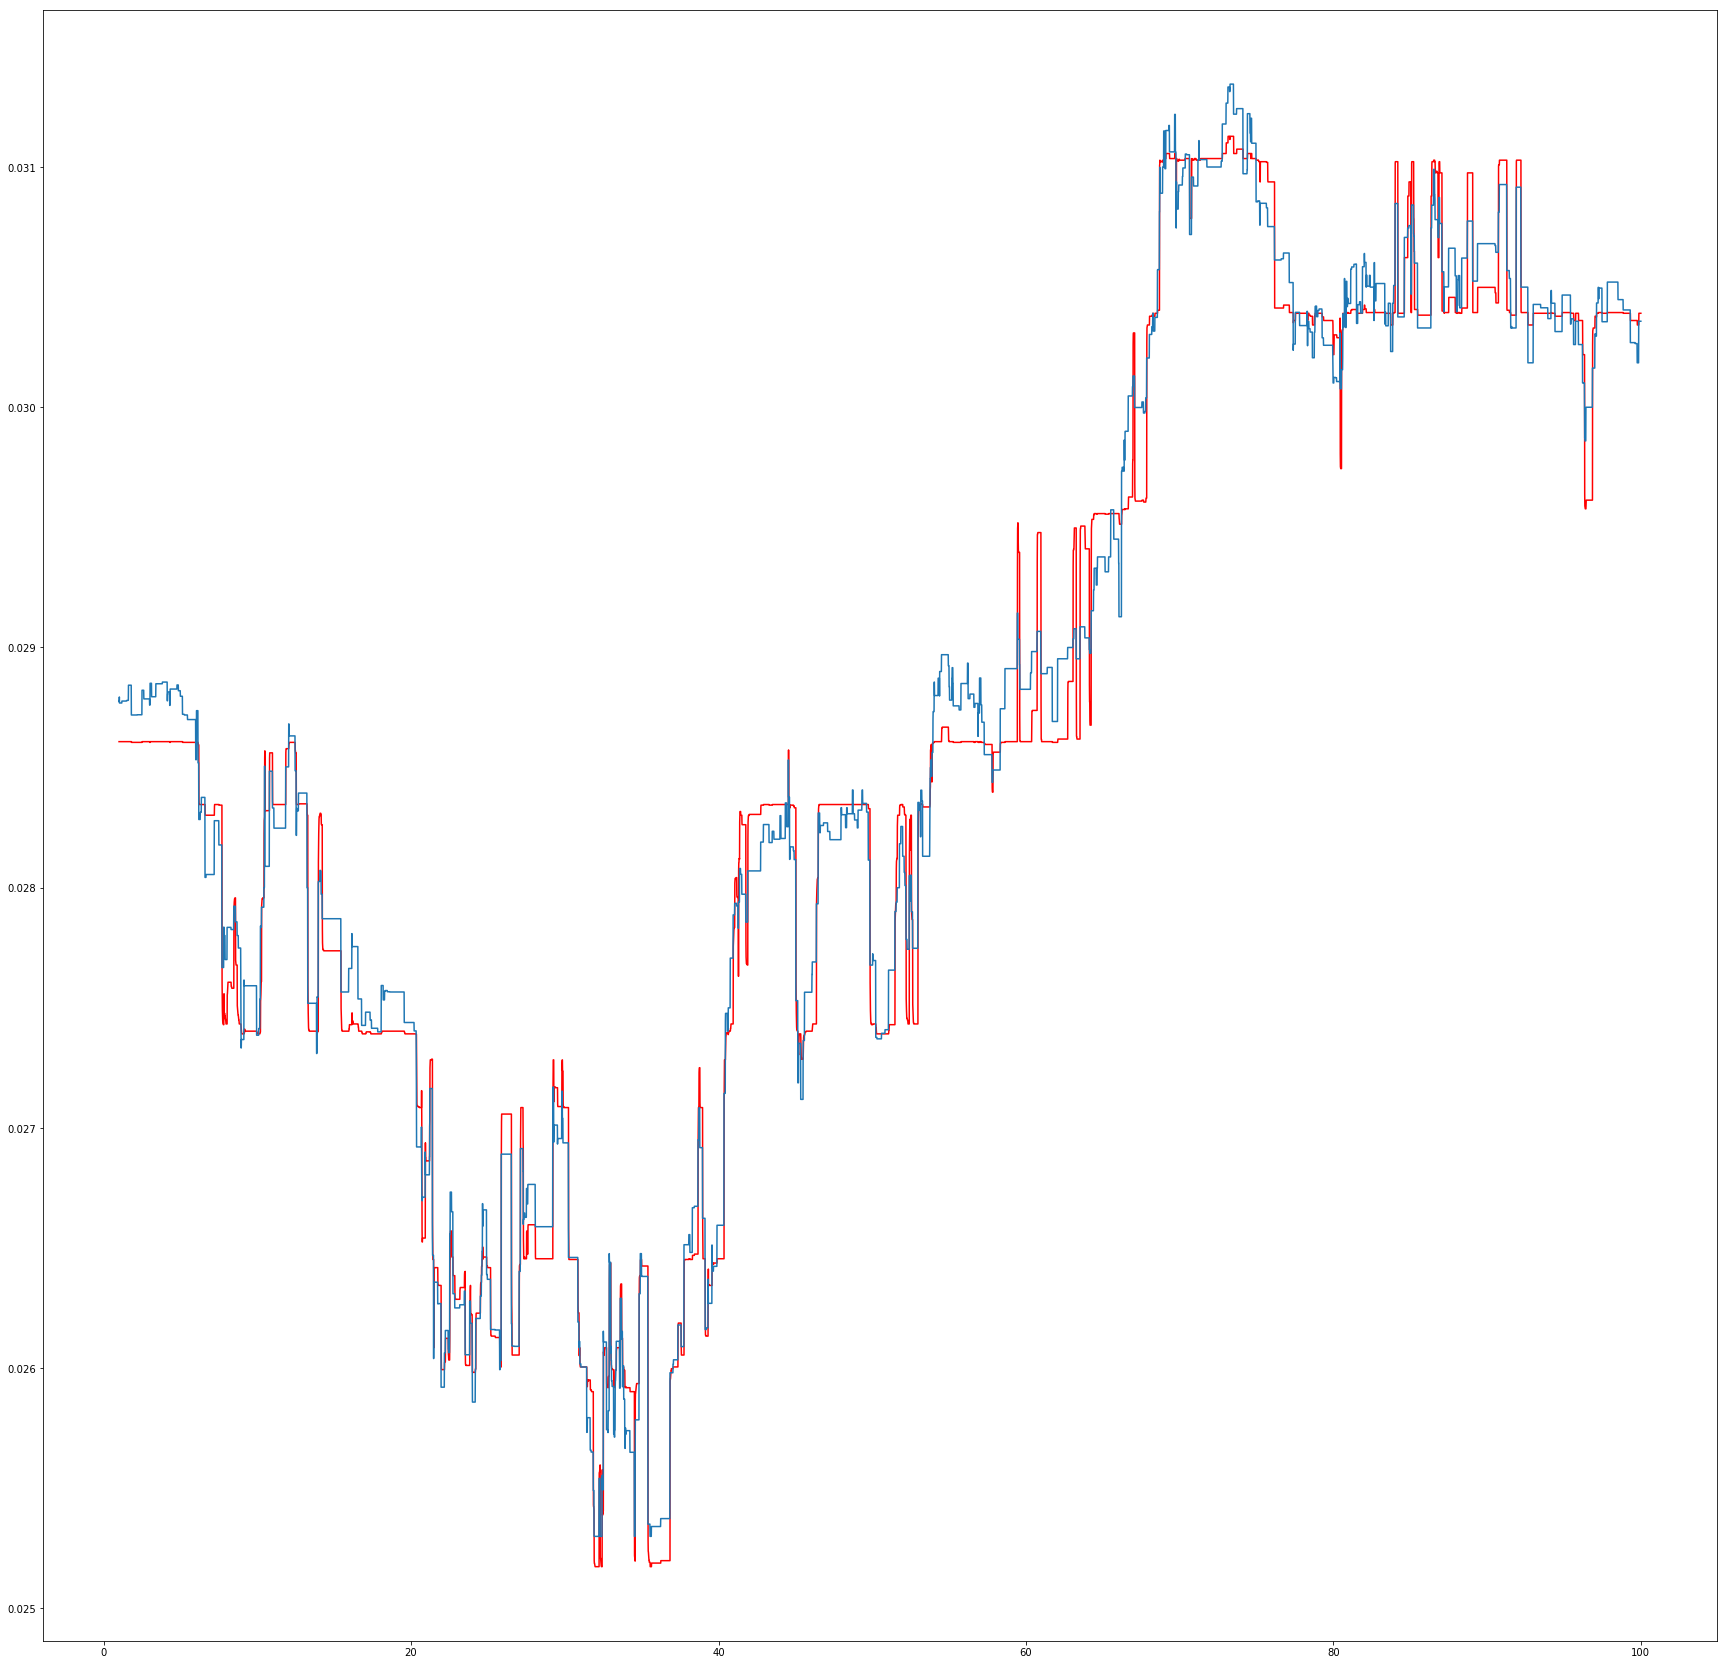

In [652]:

predictions = clf.predict(X[70000:len(X)])
print (predictions)
pyplot.figure(figsize=(30,30))
pyplot.plot(np.linspace(1,100,10000),predictions[0:10000], color = 'red')
pyplot.plot(np.linspace(1,100,10000),y[70000:80000])

print metrics.mean_absolute_error(y[70000:len(X)],predictions)/np.array(y[70000:len(X)]).mean()

In [517]:
e=0
p=0

for i in np.arange(6,403):
    if data[i]==data[i-8]:
        p+=1
    else:
        e+=1
    print data[i]

-1
1
-1
-1
1
-1
1
1
-1
1
1
1
1
1
1
-1
1
1
1
1
1
1
1
1
1
1
1
1
-1
-1
1
-1
1
-1
1
1
-1
-1
-1
1
-1
-1
-1
1
-1
1
1
1
-1
1
1
1
-1
1
-1
1
1
-1
-1
1
1
1
-1
-1
1
1
-1
1
1
1
1
-1
1
1
-1
-1
1
-1
-1
-1
-1
1
1
-1
1
1
-1
1
-1
1
1
1
-1
-1
1
1
1
-1
1
1
-1
-1
1
1
-1
1
-1
1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
1
-1
1
1
-1
-1
1
1
-1
1
-1
-1
1
1
1
1
-1
1
-1
-1
1
-1
1
-1
1
-1
1
-1
1
1
-1
1
1
1
1
-1
-1
1
1
-1
1
-1
1
-1
1
1
-1
1
-1
1
-1
1
1
1
-1
1
-1
-1
1
1
-1
-1
-1
1
1
-1
-1
-1
1
-1
-1
-1
1
-1
-1
1
1
-1
-1
1
1
1
-1
1
1
-1
-1
-1
-1
-1
1
1
1
1
-1
1
1
-1
-1
1
1
-1
1
1
1
-1
1
-1
1
1
1
-1
1
1
1
-1
1
1
-1
-1
1
-1
1
-1
-1
-1
1
-1
-1
-1
-1
-1
1
1
-1
1
-1
-1
-1
1
1
-1
1
1
1
-1
-1
1
1
1
1
1
-1
1
1
1
1
-1
-1
1
-1
1
-1
1
-1
-1
1
1
1
1
-1
1
-1
-1
-1
1
-1
-1
1
1
-1
1
-1
1
-1
1
1
-1
1
1
1
1
1
1
1
1
1
-1
1
1
-1
1
1
1
-1
-1
-1
1
1
1
1
-1
-1
1
1
-1
-1
1
-1
-1
1
-1
1
-1
1
1
1
1
-1
1
-1
1
1
-1
-1
1
1
1
1
1
-1
1
-1
1
-1
-1
-1
-1
-1
1
-1
-1
1
-1
1
-1
1
-1
1
1
-1
1
1
-1
1
1
-1
1
1
1
1
1


In [518]:
print p,e

208 189
